In [4]:
import pandas as pd
import time
import numpy as np
import datetime
from icecream import ic
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data=pd.read_csv('dataset.csv',index_col=0)

data.head()

,timestamp_year,timestamp_month,timestamp_day,total_irradiance
0,1980,1,2,NaN
1,1980,1,3,NaN
2,1980,1,4,NaN
3,1980,1,5,NaN
4,1980,1,6,NaN


In [6]:
data=data.dropna()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3053 entries, 45 to 3438
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp_year    3053 non-null   int64  
 1   timestamp_month   3053 non-null   int64  
 2   timestamp_day     3053 non-null   int64  
 3   total_irradiance  3053 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 119.3 KB


In [9]:
data.head()

,timestamp_year,timestamp_month,timestamp_day,total_irradiance
45,1980,2,16,1367.776
46,1980,2,17,1367.898
47,1980,2,18,1368.060
49,1980,2,20,1368.202
50,1980,2,21,1368.383


In [10]:
date= pd.to_datetime((data.timestamp_year*10000+data.timestamp_month*100+data.timestamp_day).apply(str),format='%Y%m%d')

In [11]:
data['date']=date

In [12]:
data.head()

,timestamp_year,timestamp_month,timestamp_day,total_irradiance,date
45,1980,2,16,1367.776,1980-02-16
46,1980,2,17,1367.898,1980-02-17
47,1980,2,18,1368.060,1980-02-18
49,1980,2,20,1368.202,1980-02-20
50,1980,2,21,1368.383,1980-02-21


In [13]:
train_data=data.loc[(data['timestamp_year'])<1988]
test_data=data.loc[(data['timestamp_year'] >= 1988) & (data['timestamp_year'] <= 1989)]


In [14]:
train_data=train_data.drop(columns=['timestamp_year','timestamp_month','timestamp_day'])
test_data=test_data.drop(columns=['timestamp_year','timestamp_month','timestamp_day'])

In [23]:
train_data.columns=['y','ds']

In [15]:
from fbprophet import Prophet

In [24]:
m=Prophet(interval_width=0.95,daily_seasonality=True)
model=m.fit(train_data)

C:\Users\Utsa Rabbani\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [28]:
future=m.make_future_dataframe(periods=730,freq='D')
forecast=m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3266,1989-12-25,1366.684799,1344.505129,1389.719697,1343.521639,1388.605705,1.040127,1.040127,1.040127,1.05999,...,-0.013742,-0.013742,-0.013742,-0.006120,-0.006120,-0.006120,0.0,0.0,0.0,1367.724927
3267,1989-12-26,1366.685485,1344.690111,1389.482462,1343.474652,1388.657240,1.046428,1.046428,1.046428,1.05999,...,-0.020253,-0.020253,-0.020253,0.006692,0.006692,0.006692,0.0,0.0,0.0,1367.731913
3268,1989-12-27,1366.686171,1344.656507,1389.521879,1343.427665,1388.708776,1.067205,1.067205,1.067205,1.05999,...,-0.014841,-0.014841,-0.014841,0.022056,0.022056,0.022056,0.0,0.0,0.0,1367.753377
3269,1989-12-28,1366.686857,1344.399873,1389.556415,1343.380677,1388.760311,1.122797,1.122797,1.122797,1.05999,...,0.023121,0.023121,0.023121,0.039686,0.039686,0.039686,0.0,0.0,0.0,1367.809654
3270,1989-12-29,1366.687544,1344.553036,1390.177601,1343.333690,1388.811846,1.134423,1.134423,1.134423,1.05999,...,0.015199,0.015199,0.015199,0.059234,0.059234,0.059234,0.0,0.0,0.0,1367.821966


In [63]:
test_data.tail()

,total_irradiance,date
3434,1367.650,1989-05-28
3435,1367.729,1989-05-29
3436,1367.588,1989-05-30
3437,1367.543,1989-05-31
3438,1367.714,1989-06-01


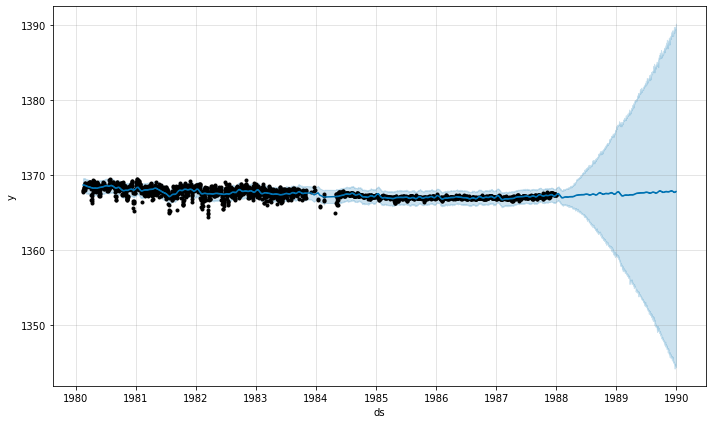

In [29]:
plot1=m.plot(forecast)

In [57]:
#map dates of y_test and forecast['y_hat']
# forecast_test=forecast
# from sklearn import metrics
# print('MAE:', metrics.mean_absolute_error(test_data_forecast, forecast_test))
# print('MSE:', metrics.mean_squared_error(test_data_forecast, forecast_test))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(test_data_forecast, forecast_test)))

ValueError: Found input variables with inconsistent numbers of samples: [512, 3271]